<a href="https://colab.research.google.com/github/Jesusmatheus156/Analise-de-dados-com-python/blob/main/Trabalho_de_an%C3%A1lise_de_dados_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABALHO 2B PEOO**

# Integrantes:

1.   Anderson Costa Alves
2.   Ana Michele da Costa Maia
1.   Gustavo Kauê Fernandes de Oliveira
2.   Matheus de Jesus Freire da Silva


Base de dados: https://dados.gov.br/dados/conjuntos-dados/sistema-de-gestao-da-transmissao-siget

Essa base de dados é da empresa Anell, uma empresa de transmissao de energia eletrica. Essa empresa divulga mensalmente e detalha as obras e marcos de execução dos empreendimentos em andamento ou concluídos recentemente. Entre as informações apresentadas na base então a data de entrada em operação estabelecida no ato
legal, a data de conclusão informada pela transmissora e a situação do empreendimento, etc.


# Questões:


Questão 1: Quantos empreendimentos estão em cada situação: "planejado" ,"em operação" ou "concluido"(piz,bar)?

Questão 2: Quantos são de cada tipo de obra: "substituição", "adequação", e "instalação"(piz,bar)?

Questão 3: Quantidade de contratos finais previstos de cada ano?(bar,line)

Questão 4:  quantas obras foram solicidadas por cada empreendimento?(bar)

Questão 5: qual a quantidade de cada tipo de modulo presentes nas obras?(piz,bar)

Questão 6: quantos contratos foram de de acordo com o id de identificação?(bar)

Questão 7: qual o valor da receita de derteminada empresa?

Questâo 8: qual é a data de previsão da conclusão da obra?

Questão 9: qual a obra com a maior valor do último ciclo tarifário?

Questão 10: Quais são os 4 tipos de instalações mais comuns?

In [ ]:
import urllib.request
import csv

def fazer_requisicao(url):
    response = urllib.request.urlopen(url)
    conteudo = response.read().decode('utf-8')
    if conteudo.startswith('\ufeff'):
      conteudo = conteudo[1:]
    return conteudo

# transformar url em arquivo
url = 'https://raw.githubusercontent.com/Gustavo94820/arquivo/main/siget-contrato-empreendimento-obra-modulo.csv'
arquivo = fazer_requisicao(url)

In [ ]:
from urllib import request

In [ ]:
request.urlretrieve('https://raw.githubusercontent.com/Gustavo94820/arquivo/main/siget-contrato-empreendimento-obra-modulo.csv', 'siget-contrato-empreendimento-obra-modulo.csv')

('siget-contrato-empreendimento-obra-modulo.csv',
 <http.client.HTTPMessage at 0x7d1ecdb235e0>)

#Funções que serão utilizadas no programas

In [ ]:
#1º função abrir arquivo csv

import csv
from matplotlib import pyplot as plt

#função para abrir o arquivo, usada em todas as funções
def abrir_arquivo_csv(nome_arquivo):
  with open(nome_arquivo, 'r') as arquivo:
    base = list(csv.reader(arquivo, delimiter = ';'))
    base = base[1:]
    return base



# função para contar, usada na questão 1 e 2
def contar_coluna(arquivo_csv, coluna):
  base_de_dados = abrir_arquivo_csv(arquivo_csv)
  contador = {}
  for linha in base_de_dados:
    x = linha[coluna]
    if x in contador.keys():
      contador[x] +=1
    else:
      contador[x] = 1
  contador_ord = dict(sorted(contador.items(), key=lambda item: item[1], reverse=True))
  for tipo, valor in contador_ord.items():
    print(f'{tipo}:{valor}')
  return contador



#2º função para pegar a data de conclusão de uma obra
def previsao_conclusao_obra(nome_empresa, nome_arquivo):
    base = abrir_arquivo_csv(nome_arquivo)
    for linha in base:
      nome = str(linha[5])
      if nome == nome_empresa:
        previsao = linha[9]
        return previsao



#3º função para organização
def caracteres():
  print('-------------------------------------------------------')




#4º função para pegar a receita de uma determinada empresa(Questão 10)
def obter_valor_receita(nome_empresa, nome_arquivo):
  tabela = abrir_arquivo_csv(nome_arquivo)
  for linha in tabela:
    nome = str(linha[5])
    if nome == nome_empresa:
      receita = str(linha[29])
      return receita



#função parecida com 'contar_coluna()' porem pegará os 4 ultimos valores(os que representam o ano), usada na questão 4
def quantidade_contratos_por_ano(arquivo_csv,coluna):
  leitor_csv = abrir_arquivo_csv(arquivo_csv)
  contador = {}
  for linha in leitor_csv:
    x = linha[coluna]
    y = x[6:10]
    if y in contador.keys():
      contador[y] +=1
    else:
      contador[y] = 1
  contador_ordenado = dict(sorted(contador.items(), key=lambda item: item[1], reverse=True))
  del contador_ordenado['']
  for i, j in contador_ordenado.items():
    print(f'{i}:{j}')

  plt.figure(figsize=(16, 6))
  plt.title('Quantidade de Contratos Finais Previstos por Ano')
  plt.xlabel('Ano')
  plt.ylabel('Quantidade')
  plt.plot(contador_ordenado.keys(), contador_ordenado.values(),  marker='o')
  for ano, quantidade in contador_ordenado.items():
    plt.text(ano, quantidade, str(quantidade), ha='center', va='bottom', fontsize=10)
  plt.show()


def quantidade_contratos_por_ano_5(arquivo_csv,coluna):
  leitor_csv = abrir_arquivo_csv(arquivo_csv)
  contador = {}
  for linha in leitor_csv:
    x = linha[coluna]
    y = x[6:10]
    if y in contador.keys():
      contador[y] +=1
    else:
      contador[y] = 1
  return contador


def modulo_da_obra(arquivo_csv):
  arquivo = abrir_arquivo_csv(arquivo_csv)
  contador_modulo = {}
  for linha in arquivo:
    x = linha[21]
    if x in contador_modulo.keys():
      contador_modulo[x] +=1
    else:
      contador_modulo[x] = 1
  contador_modulo = dict(sorted(contador_modulo.items(), key=lambda item: item[1], reverse=True))
  for tipo, valor in contador_modulo.items():
    print(f'{tipo}:{valor}')
  return contador_modulo



def grafico_pizza_questao13(dicionario):
    plt.title('4 tipos de instalações mais comuns')
    plt.pie(dicionario.values(), labels=dicionario.keys(), autopct='%1.1f%%')
    plt.show()

def contar_coluna13(arquivo_csv, coluna):
    base_de_dados = abrir_arquivo_csv(arquivo_csv)
    contador = {}
    for linha in base_de_dados:
        tipo_instalacao = linha[coluna]
        if tipo_instalacao in contador:
            contador[tipo_instalacao] += 1
        else:
            contador[tipo_instalacao] = 1

    chaves_indesejadas = ["Instalação Exclusiva de Gerador", "Instalação Internacional", "Consumidor", "Gerador"]
    for chave in chaves_indesejadas:
        contador.pop(chave, None)
    contador_ordenado = dict(sorted(contador.items(), key=lambda item: item[1], reverse=True))
    for tipo, valor in contador_ordenado.items():
        print(f'{tipo}: {valor}')
    grafico_pizza_questao13(contador_ordenado)


def grafico_barras(dicionario_valores):
  legenda = input("digite o titulo principal: ")
  dados_h = input("digite o titulo do eixo horizontal: ")
  dados_v = input("digite o titulo do eixo vertical: ")
  contador_ordenado = dict(sorted(dicionario_valores.items(), key=lambda item: item[1], reverse=True))
  plt.figure(figsize=(14, 6))
  plt.title(legenda)
  plt.xlabel(dados_h)
  plt.ylabel(dados_v)
  plt.bar(contador_ordenado.keys(), contador_ordenado.values())
  for ano, quantidade in contador_ordenado.items():
    plt.text(ano, quantidade, str(quantidade), ha='center', va='bottom', fontsize=10)
  plt.show()
def grafico_linha(dicionario):
  plt.figure(figsize=(17, 6))
  plt.title("quantos obras foram concluídos antes da data de previsão de conclusão")
  plt.xlabel("Anos")
  plt.ylabel("Quantidade")
  plt.plot(dicionario.keys(), dicionario.values())


def grafico_pizza_questao1(dicionario):
  titulo = input("digite o titulo")
  contador_ordenado = dict(sorted(dicionario.items(), key=lambda item: item[1], reverse=True))
  plt.title(titulo)
  plt.pie(dicionario.values(), autopct='%1.1f%%' )
  plt.legend(dicionario.keys())
  plt.show()

Em Operação:6163
Em andamento:2215
Concluído:850
Planejado:188
digite o tituloprojrto


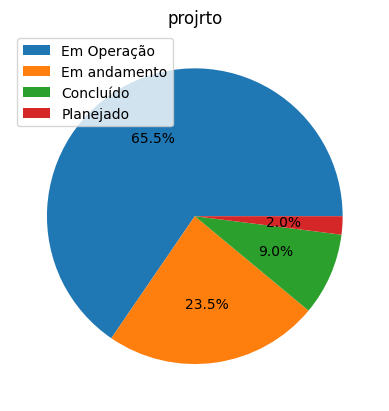

In [ ]:
#questão 1: Quantos empreendimentos estão em cada situação: "planejado" ,"em operação" ou "concluido"?
arquivo_csv = 'siget-contrato-empreendimento-obra-modulo.csv'
a = contar_coluna(arquivo_csv, 7)
grafico_pizza_questao1(a)

Instalação:9097
Ampliação:170
Adequação:91
Substituição:45
Seccionamento:10
Recapacitação:2
Remanejamento:1
digite o titulo principal: projeto
digite o titulo do eixo horizontal: linha1
digite o titulo do eixo vertical: linha2


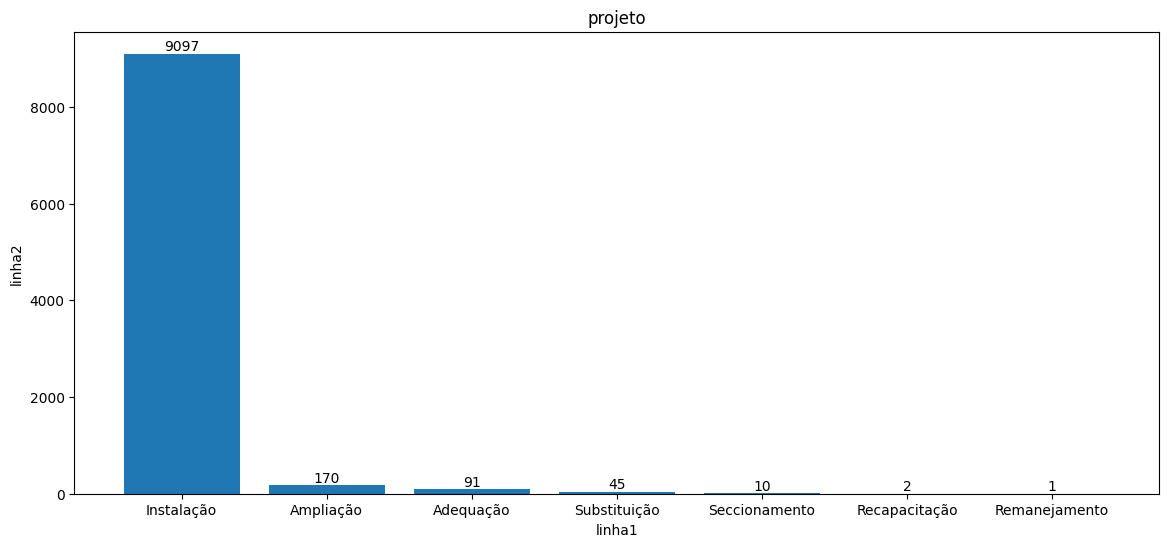

In [ ]:
#Questão 2 - Quantas obras são de cada tipo: substituição, adequação, instalação, seccionamento, remanejamento e recapacitação? concluída

arquivo_csv = 'siget-contrato-empreendimento-obra-modulo.csv'
a = contar_coluna(arquivo_csv,16)
grafico_barras(a)

2022:1067
2023:937
2021:742
2024:633
2014:617
2010:566
2011:564
2026:544
2012:527
2013:408
2009:360
2027:349
2025:332
2019:279
2016:275
2008:215
2015:209
2018:163
2017:157
2020:134
2028:85
2030:25
2007:20
2006:10


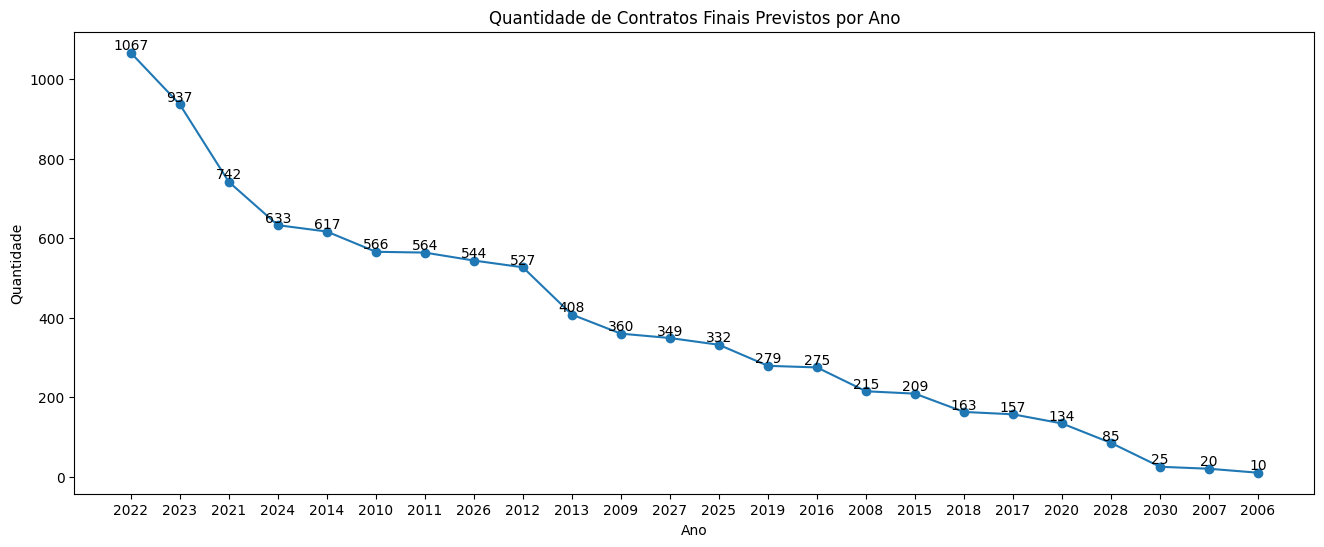

In [ ]:
#Questão 3 - Quantidade de contratos finais previstos de cada ano?

arquivo_csv = 'siget-contrato-empreendimento-obra-modulo.csv'
a = quantidade_contratos_por_ano(arquivo_csv, 9)

2:5714
3:2090
4:1029
1:583
digite o titulo principal: quantidade de cada tipo de modulo
digite o titulo do eixo horizontal: Tipos
digite o titulo do eixo vertical: Quantidade


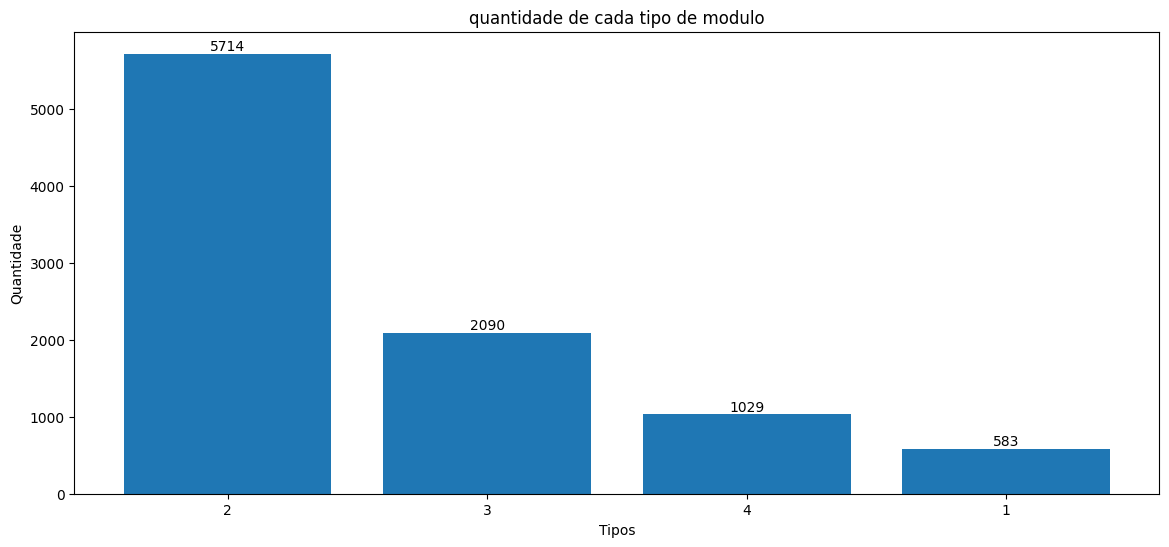

In [ ]:
#Questão 5: qual a quantidade de cada tipo de modulo presentes nas obras?

nome_arquivo = 'siget-contrato-empreendimento-obra-modulo.csv'
modulo_da_obra = modulo_da_obra(nome_arquivo)
grafico_barras(modulo_da_obra)

Rede Básica: 6575
Rede Básica de Fronteira: 1403
Demais Instalações: 1204
Instalação Compartilha de Geração: 174


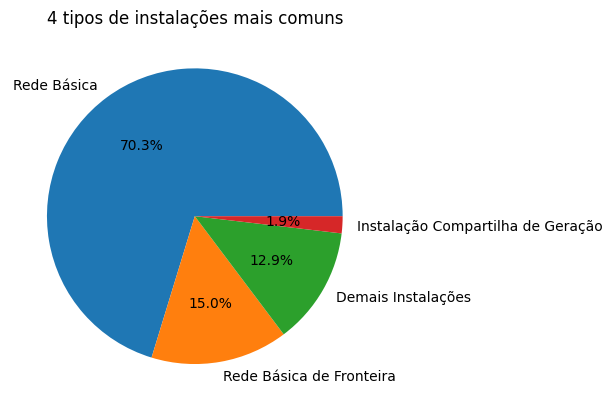

In [ ]:
#questão 10 - Quais são os 4 tipos de instalações mais comuns?

arquivo_csv = 'siget-contrato-empreendimento-obra-modulo.csv'
contar_coluna13(arquivo_csv, 27)

In [ ]:
#questão 7 - qual o valor da receita de derteminada empresa?  Questão pronta

import csv

def formatar_receita(receita):
    unidades = ['', 'mil', 'milhão', 'bilhão', 'trilhão', 'quatrilhão']
    contador = 0

    while receita >= 1000 and contador < len(unidades) - 1:
        receita /= 1000
        contador += 1

    return f"R$ {receita:.2f} {unidades[contador]}"

def calcular_receita_empresa(arquivo_csv, empresa_desejada):
    total_receita = 0

    with open(arquivo_csv, 'r') as arquivo:
        leitor_csv = csv.reader(arquivo, delimiter=';')
        next(leitor_csv)  # Ignorar o cabeçalho

        for linha in leitor_csv:
            empresa = linha[5]  # Coluna com o nome da empresa
            valor_receita_str = linha[29].replace(',', '')  # Coluna com o valor da receita do último ciclo tarifário

            if empresa == empresa_desejada:
                try:
                    valor_receita = float(valor_receita_str)
                    total_receita += valor_receita
                except ValueError:
                    # Caso o valor da receita não seja um número válido, ignoramos a linha
                    continue

    return total_receita

nome_arquivo = 'siget-contrato-empreendimento-obra-modulo.csv'
empresa_desejada = 'LT Paracatu 4 / Pirapora 2'  # Substitua pelo nome da empresa que você deseja consultar
receita_empresa = calcular_receita_empresa(nome_arquivo, empresa_desejada)

receita_formatada = formatar_receita(receita_empresa)
print(f"A receita total da empresa '{empresa_desejada}' é de {receita_formatada}")

In [ ]:
# questão 8 - qual é a data de previsão da conclusão de determinada obra? Questão pronta

nome_empresa = 'Expansão do Sistema de Transmissão do Mato Grosso'
nome_arquivo = 'siget-contrato-empreendimento-obra-modulo.csv'
data_previsao = previsao_conclusao_obra(nome_empresa, nome_arquivo)
if data_previsao:
    caracteres()
    print('A data de previsão da conclusão da obra é:', data_previsao)
    caracteres()
else:
  print('A empresa não foi encontrada')

In [ ]:
#Questão 9 - qual a obra com a maior valor do último ciclo tarifário? questão ainda não terminada
import csv

def converter_para_float(valor_str):
    valor_str = valor_str.replace(',', '.')
    return float(valor_str) if valor_str else 0.0

def maior_receita(arquivo_csv):
    base_de_dados = abrir_arquivo_csv(arquivo_csv)
    valores_receita = []
    obras = []
    for linha in base_de_dados:
        valor_receita_str = linha[29]
        valor_receita = converter_para_float(valor_receita_str)
        valores_receita.append(valor_receita)
        obras.append(linha[12])
    maior_receita = max(valores_receita)
    index_maior_receita = valores_receita.index(maior_receita)
    obra_maior_receita = obras[index_maior_receita]

    return obra_maior_receita, maior_receita

arquivo_csv = 'siget-contrato-empreendimento-obra-modulo.csv'
obra, receita = maior_receita(arquivo_csv)
print(f"A obra com a maior receita do último ciclo tarifário é '{obra}' com valor de R${receita:.2f}")


In [ ]:
#questão 4: quantas obras foram solicidadas por cada empreendimento?
import csv

def contar_obras_por_empreendimento(arquivo_csv):
    contador_obras_por_empreendimento = {}

    with open(arquivo_csv, 'r') as arquivo:
        leitor_csv = csv.reader(arquivo, delimiter=';')
        next(leitor_csv)  # Ignorar o cabeçalho

        for linha in leitor_csv:
            empreendimento = linha[5]  # Coluna com o nome do empreendimento

            if empreendimento in contador_obras_por_empreendimento:
                contador_obras_por_empreendimento[empreendimento] += 1
            else:
                contador_obras_por_empreendimento[empreendimento] = 1

    return contador_obras_por_empreendimento

def exibir_resultado(contador):
    for empreendimento, quantidade_obras in contador.items():
        print(f"{empreendimento}: {quantidade_obras}")

nome_arquivo = 'siget-contrato-empreendimento-obra-modulo.csv'
contador_obras_por_empreendimento = contar_obras_por_empreendimento(nome_arquivo)

exibir_resultado(contador_obras_por_empreendimento)

In [ ]:
#questão 6: gráfico grande demais
import csv

def contar_contratos_por_identificador(arquivo_csv):
    contador_contratos_por_identificador = {}

    with open(arquivo_csv, 'r') as arquivo:
        leitor_csv = csv.reader(arquivo, delimiter=';')
        next(leitor_csv)  # Ignorar o cabeçalho

        for linha in leitor_csv:
            identificador = linha[3]  # Coluna com o IdeCcd

            if identificador in contador_contratos_por_identificador:
                contador_contratos_por_identificador[identificador] += 1
            else:
                contador_contratos_por_identificador[identificador] = 1

    return contador_contratos_por_identificador

def exibir_resultado(contador):
    for identificador, quantidade_contratos in contador.items():
        print(f"Identificador: {identificador} - Quantidade de Contratos: {quantidade_contratos}")

nome_arquivo = 'siget-contrato-empreendimento-obra-modulo.csv'
contador_contratos_por_identificador = contar_contratos_por_identificador(nome_arquivo)

exibir_resultado(contador_contratos_por_identificador)